In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
cars = pd.read_csv('autoru_cleaned.csv')

In [171]:
cars.head()

,km_age,mark,model,power,segment,state,transmission,year,engine_type,region,body_type,color,drive_type,drive_type_imputed,wheell_type,condition,owners_count,customs_cleared,price
0,60000,KIA,OPTIMA,188,MEDIUM,used,AUTOMATIC,2018,GASOLINE,Зеленоград,седан,синий,передний,0,Левый,Не требует ремонта,1 владелец,Растаможен,1600000
1,74000,AUDI,A4,170,PREMIUM,used,VARIATOR,2012,GASOLINE,Москва,седан,белый,передний,0,Левый,Не требует ремонта,3 или более,Растаможен,1040000
2,39900,GAZ,21,75,MEDIUM,used,MECHANICAL,1970,GASOLINE,Москва,седан,серый,задний,0,Левый,Не требует ремонта,2 владельца,Растаможен,390000
3,120000,TOYOTA,VENZA,185,MEDIUM,used,AUTOMATIC,2013,GASOLINE,Москва,внедорожник 5 дв.,белый,полный,0,Левый,Не требует ремонта,2 владельца,Растаможен,1575000
4,453844,MERCEDES,G_KLASSE,215,PREMIUM,used,AUTOMATIC,2000,GASOLINE,Москва,внедорожник 5 дв.,чёрный,полный,0,Левый,Не требует ремонта,3 или более,Растаможен,1098000


#### У меня есть несколько гипотез, которые я бы хотел проверить.
1. Новые автомобили стоят больше, чем подержанные.
2. Чем больше лошадинные сил, тем больше цена.
3. Премиум сегмент, дороже остальных.
4. Чем больше владелецев, тем дешевле цена.
5. Чем старше автомобиль, тем он дешевле.
6. Чем больше пробег, тем дешевле автомобиль.

### 1. Новые автомобили стоят больше, чем подержанные.

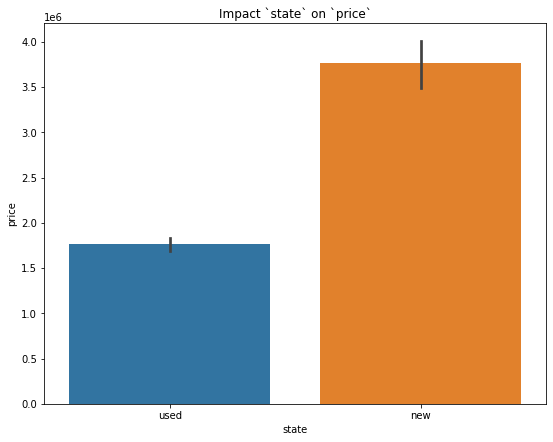

In [184]:
plt.figure(figsize=(9,7))
state_fig = sns.barplot(x='state', y='price', data=cars);
state_fig.set_title("Impact `state` on `price`");

**Вывод:** Гипотеза подтвердилась.

### 2. Чем больше лошадинные сил, тем больше цена.

<Figure size 648x360 with 0 Axes>

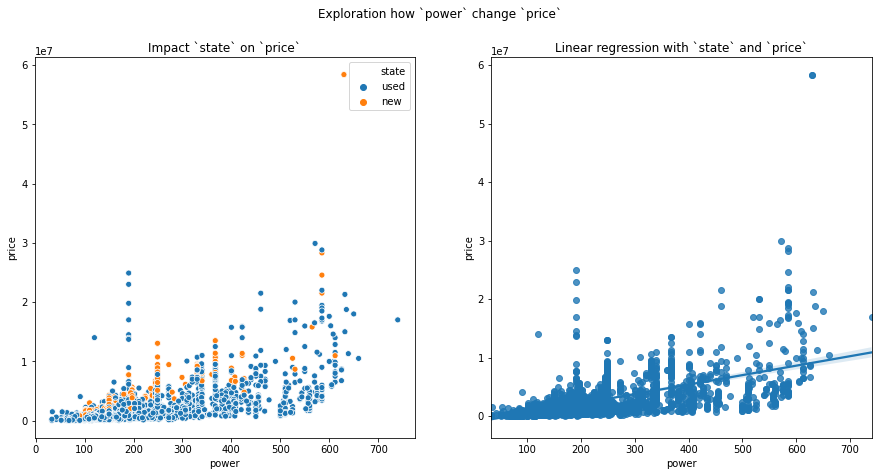

In [191]:
plt.figure(figsize=(9,5))
fig, axes = plt.subplots(1, 2, figsize=(15, 7));
fig.suptitle("Exploration how `power` change `price`")
power_scatter_fig = sns.scatterplot(ax=axes[0], x='power', y='price', hue='state', data=cars);
power_scatter_fig.set_title("Impact `state` on `price`");
regplot_scatter_fig = sns.regplot(ax=axes[1], x='power', y='price', data=cars);
regplot_scatter_fig.set_title("Linear regression with `state` and `price`");

In [218]:
# Коэффициент корреляци между `power` и `price`
round(cars['power'].corr(cars['price']), 2)

0.62

**Вывод:** Гипотеза подтвердилась.

### 3. Премиум сегмент, дороже остальных.

In [175]:
def cat_plots(order, feature, nrows=1, ncols=3, figsize=(15, 9)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle(f'{feature.capitalize()} exploration')
    segment_countplot = sns.countplot(ax=axes[0], y=feature, data=cars, 
                 order=order);
    segment_countplot.set_title(f'Countplot of `{feature}`')

    segment_countplot = sns.barplot(ax=axes[1], x=feature, y='price', data=cars, 
               order=order);
    segment_countplot.set_title(f'Impact `{feature}` on `price`')

    segment_countplot = sns.boxplot(ax=axes[2], x=feature, y='price', data=cars, 
               order=order);
    segment_countplot.set_title('Outliers check');

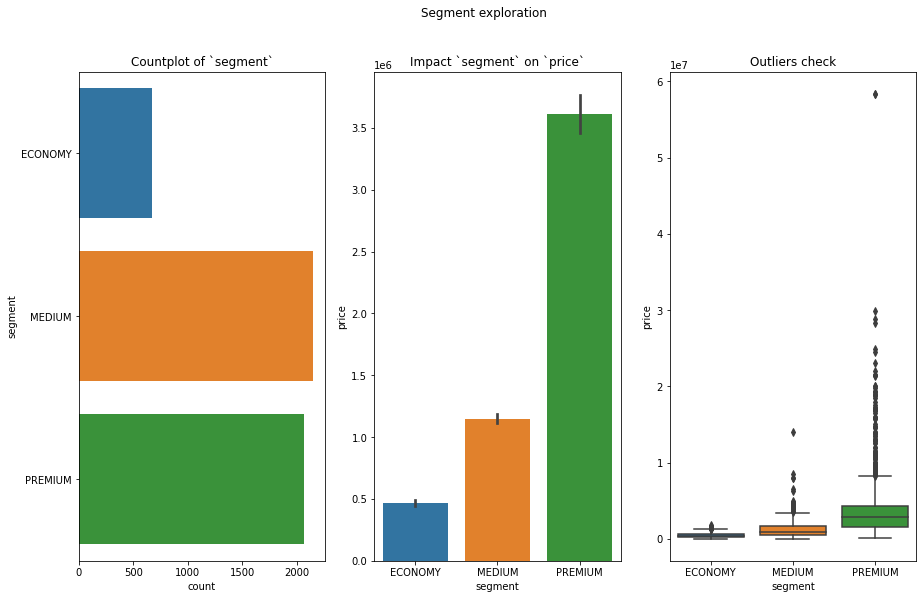

In [176]:
cat_plots(order=['ECONOMY', 'MEDIUM', 'PREMIUM'], feature='segment')

**Вывод:** Гипотеза подтвердилась. И также у категории `PREMIUM` много выбросов.

### 4. Чем больше владелецев, тем дешевле цена.

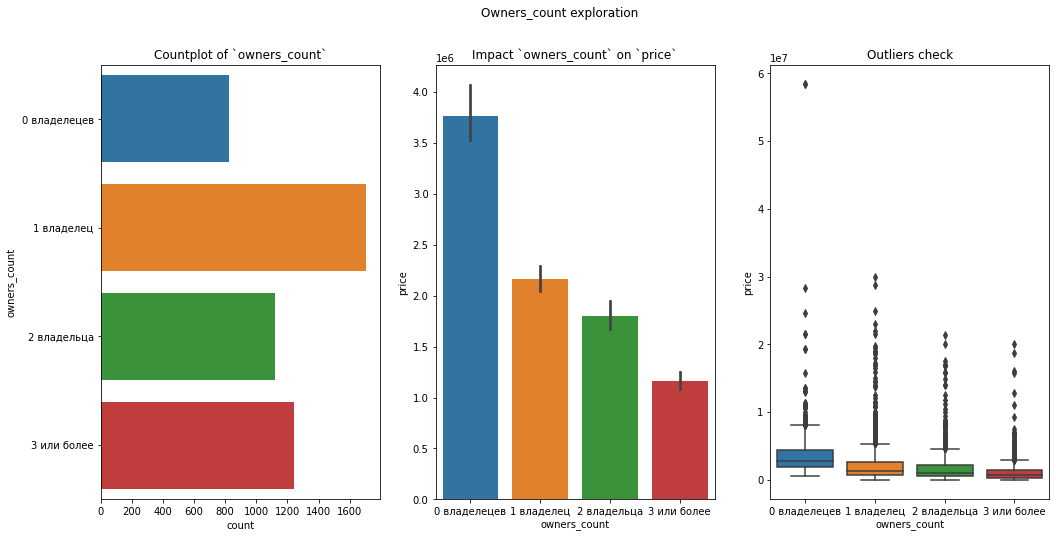

In [177]:
cat_plots(order=["0 владелецев", "1\xa0владелец", "2\xa0владельца", "3 или более"], feature='owners_count', figsize=(17, 8))

**Вывод:** Гипотеза подтвердилась.

### 5. Чем старше автомобиль, тем он дешевле.

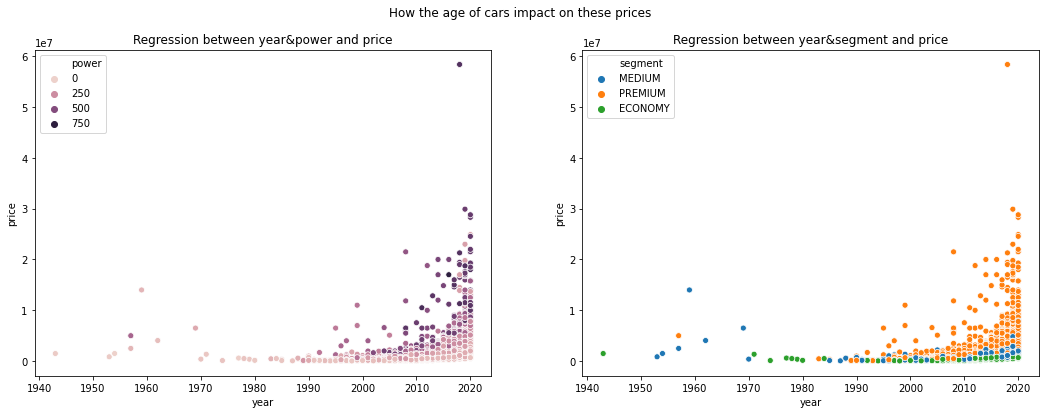

In [220]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

fig.suptitle('How the age of cars impact on these prices')
year_power_scatter = sns.scatterplot(ax=axes[0], data=cars, x='year', y='price', hue='power');
year_power_scatter.set_title("Regression between year&power and price")
year_segment_scatter = sns.scatterplot(ax=axes[1], data=cars, x='year', y='price', hue='segment');
year_segment_scatter.set_title("Regression between year&segment and price");

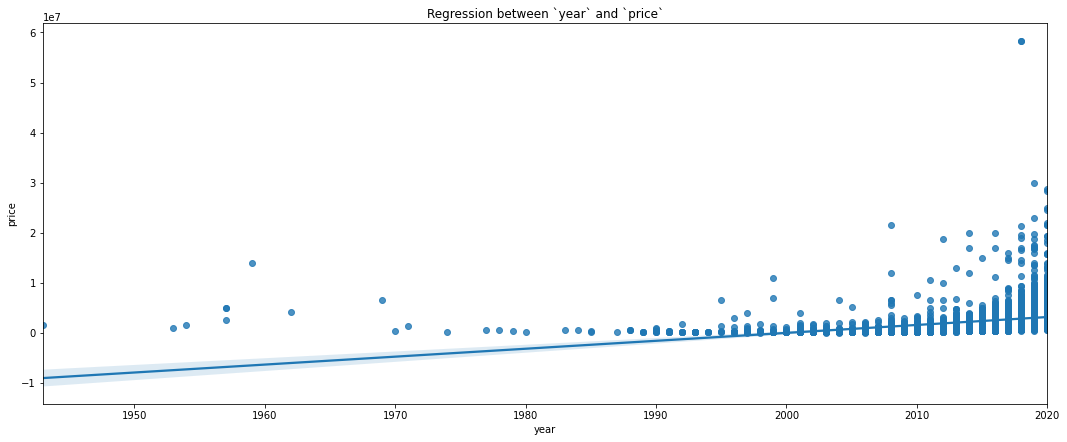

In [213]:
plt.figure(figsize=(18,7))
year_regplot = sns.regplot(x='year', y='price', data=cars)
year_regplot.set_title("Regression between `year` and `price`");

In [212]:
# Коэффициент корреляци между `year` и `price`
round(cars['year'].corr(cars['price']), 2)

0.36

**Вывод:** Гипотеза подтвердилась. 

### 6. Чем больше пробег, тем дешевле автомобиль.

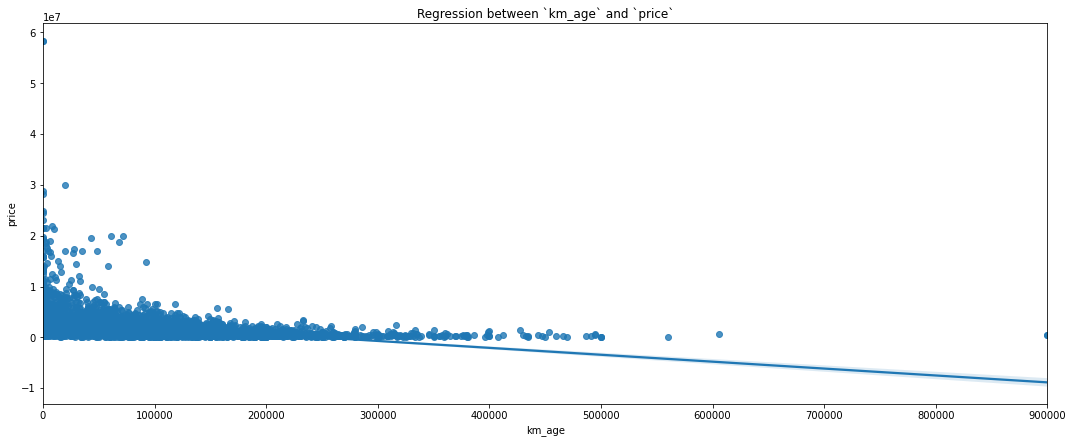

In [216]:
plt.figure(figsize=(18,7))
year_regplot = sns.regplot(x='km_age', y='price', data=cars)
year_regplot.set_title("Regression between `km_age` and `price`");

In [221]:
# Коэффициент корреляци между `km_age` и `price`
round(cars['km_age'].corr(cars['price']), 2)

-0.4

####  Итог проверки гипотезы:
1. Новые автомобили стоят больше, чем подержанные.$\color{green}{\text{Подтвердилась}}$
2. Чем больше лошадинные сил, тем больше цена.$\color{green}{\text{Подтвердилась}}$
3. Премиум сегмент, дороже остальных.$\color{green}{\text{Подтвердилась}}$
4. Чем больше владелецев, тем дешевле цена.$\color{green}{\text{Подтвердилась}}$
5. Чем старше автомобиль, тем он дешевле.$\color{green}{\text{Подтвердилась}}$
6. Чем больше пробег, тем дешевле автомобиль.$\color{green}{\text{Подтвердилась}}$

### Посмотрим на другие фичи, попробуем отрыть инсайты.

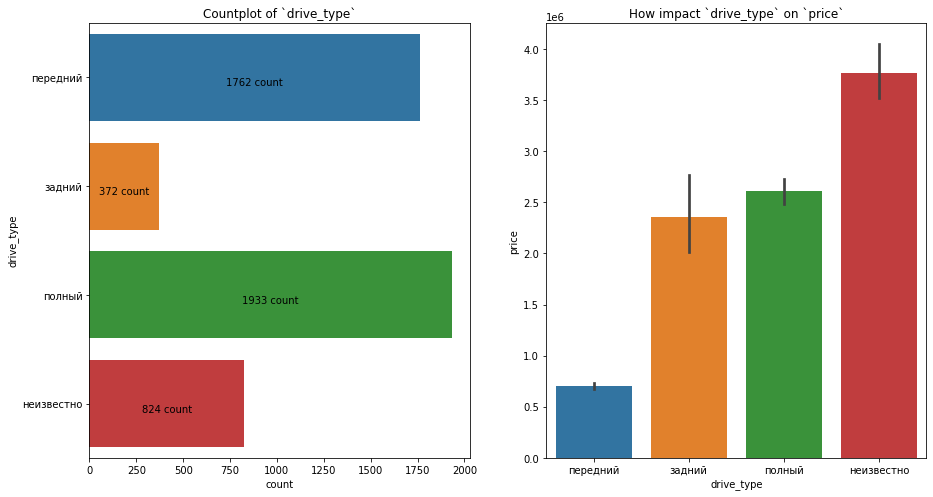

In [180]:
# plt.figure(figsize=(9,7))
# sns.barplot(data=cars, x='drive_type', y='price');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
countplot = sns.countplot(ax=axes[0], y='drive_type', data=cars);
countplot.set_title('Countplot of `drive_type`')
barplot = sns.barplot(ax=axes[1], data=cars, x='drive_type', y='price');
barplot.set_title('How impact `drive_type` on `price`')
for p in countplot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    width = p.get_width()
    countplot.annotate(f'{width} count', (x.mean(), (y - 0.35)), ha='center', va='center')

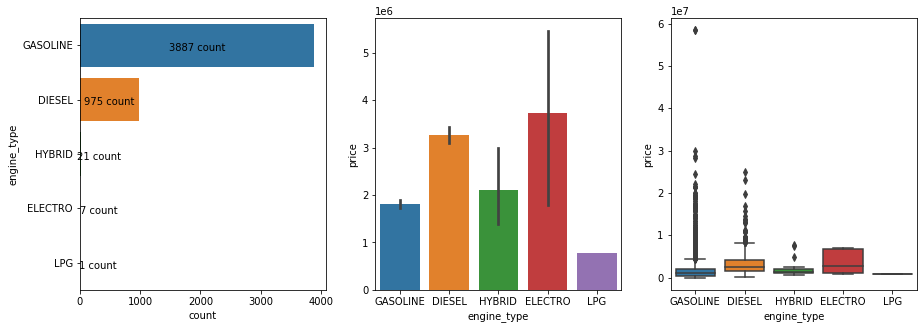

In [181]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
countplot = sns.countplot(ax=axes[0], y='engine_type', data=cars);
sns.barplot(ax=axes[1], data=cars, x='engine_type', y='price');
sns.boxplot(ax=axes[2], data=cars, x='engine_type', y='price');
for p in countplot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    width = p.get_width()
    if width > 900:
        countplot.annotate(f'{width} count', (x.mean(), (y - 0.35)), ha='center', va='center')
    else:
        countplot.annotate(f'{width} count', (x.max() + 300, (y - 0.35)), ha='center', va='center')

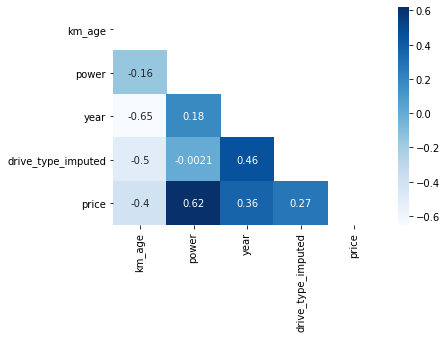

In [182]:
corr = cars.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues');